In [42]:
from avatar_models.utils.util import get_config
import pandas as pd
import os
from avatar_models.captioning.evaluate import CaptionWithAttention
from tqdm import tqdm
from avatar_models.captioning.catr.predict import CATRInference
from avatar_models.utils.bleu import get_ms_coco_captions
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


# Code from https://gist.github.com/yinleon/8a6bf8c2f3226a521680f930f3d4339f

def resize_img_to_array(img, img_shape=(244, 244)):
    img_array = np.array(
        img.resize(
            img_shape, 
            Image.ANTIALIAS
        )
    )
    
    return img_array

def image_grid(fn_images : list, 
               text : list =[], 
               top : int = 10, 
               per_row : int = 2,
               dim: tuple = (150,150) ):
    """
    fn_images is a list of image paths.
    text is a list of annotations.
    top is how many images you want to display
    per_row is the number of images to show per row.
    """
    img_width, img_height = dim
    for i in range(len(fn_images[:top])):
        if i % per_row == 0:
             _ , ax = plt.subplots(1, per_row, 
                                   sharex='col', 
                                   sharey='row', 
                                   figsize=(24, 6))
        j = i % per_row
        image = Image.open(fn_images[i])
        image = resize_img_to_array(image, 
                                    img_shape=(img_width, 
                                               img_height))
        ax[j].imshow(image)
        ax[j].axis('off')
        if text:
            offset = -10
            start = -30
            for t in text[i]:
                start += offset
                ax[j].annotate(t,
                              (0,0), (0, start), 
                               xycoords='axes fraction', 
                               textcoords='offset points', 
                               va='top')

# Show Predictions of the CATR Captioning Model 

Dev Setup: dev_config.json will be used
Dev Setup: dev_config.json will be used
Use CATR Model with GPU cuda:0


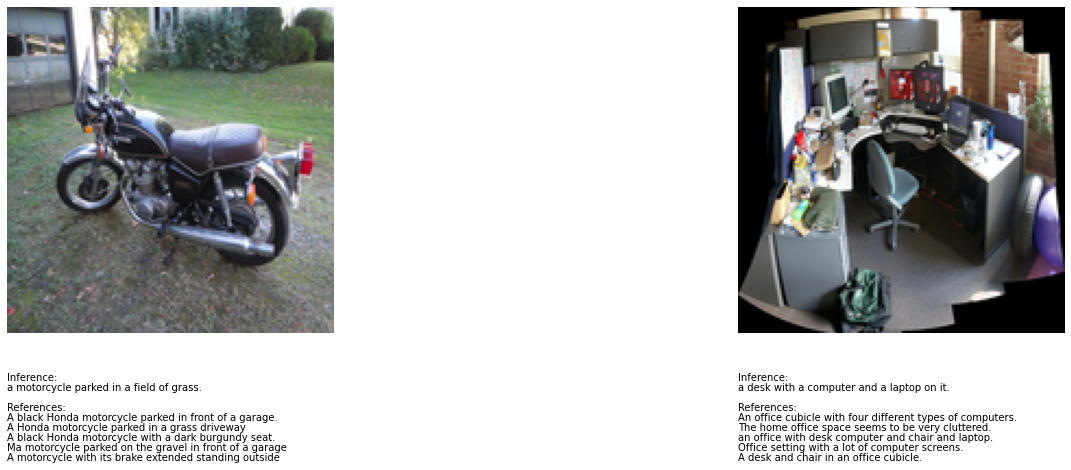

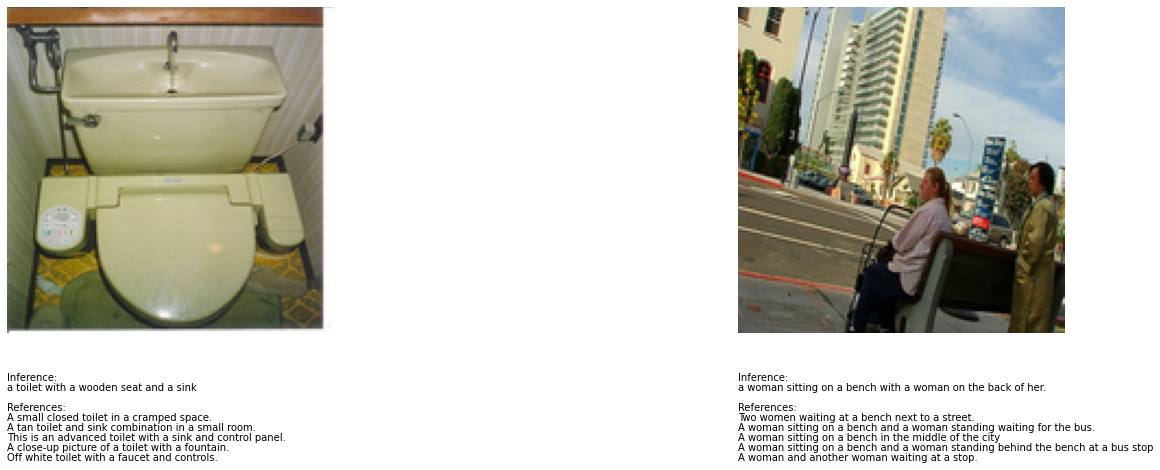

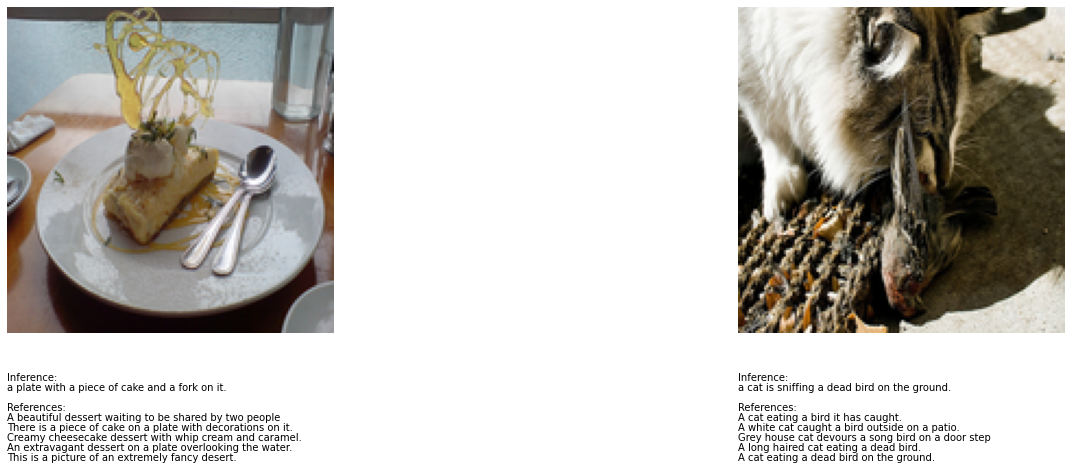

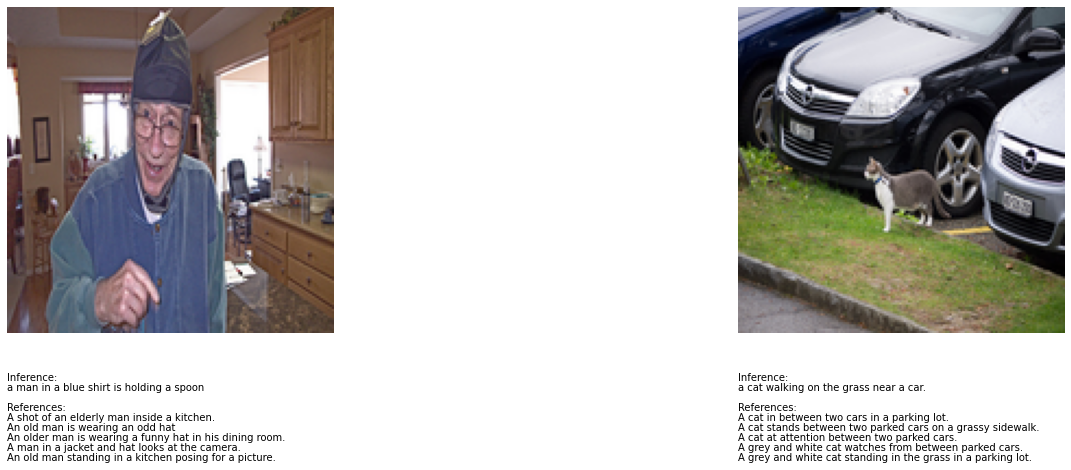

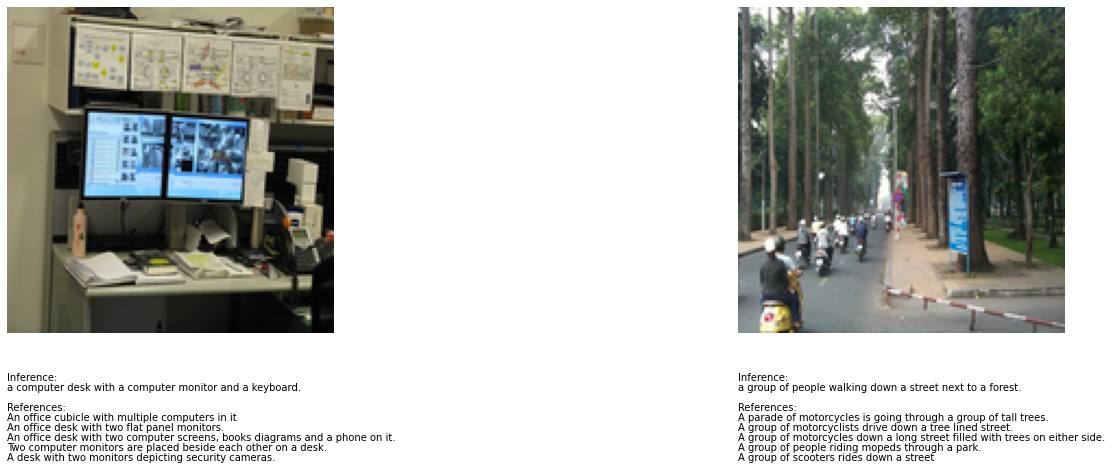

In [44]:
#TODO Does react to columns / rows config... Fix that

IMAGES_TO_DISPLAY = 12
captions = get_ms_coco_captions(image_number=IMAGES_TO_DISPLAY)
columns = 2
caption_expert = CATRInference()
refs = [ captions[k] for k in captions.keys()]
all_cap = []
for i, k in enumerate(captions.keys()):
    cap = [ "Inference:\n",  caption_expert.infer(k), "","References:\n" ]
    cap.extend(captions[k])
    all_cap.append(cap)
    
rows = IMAGES_TO_DISPLAY/columns

image_grid(list(captions.keys()), all_cap)